<a href="https://colab.research.google.com/github/Sayara20/LimpiezaDatos/blob/main/AnalsisBalones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import unicodedata
import re
import nltk



In [ ]:
#CArgar archivo
df = pd.read_csv("balones.csv",encoding='utf-8')
df.head()

,attachments/0/__typename,attachments/0/blurred_image/uri,attachments/0/cix_screen,attachments/0/fallback_image/height,attachments/0/fallback_image/uri,attachments/0/fallback_image/width,attachments/0/id,attachments/0/image/height,attachments/0/image/uri,attachments/0/image/width,...,parentReply/author/id,parentReply/author/name,parentReply/id,profileId,profileName,profilePicture,profileUrl,replyToCommentId,text,threadingDepth
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.49363E+14,GentleJackfruit9422,https://scontent.fsac1-2.fna.fbcdn.net/v/t39.3...,NaN,NaN,Para dar en qué precio los balones ????,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,pfbid0UmZxEWxiQK1etZ8ut2dboQqHQij3QizhUEqeVcZR...,Ef Leal,https://scontent.fsac1-1.fna.fbcdn.net/v/t39.3...,NaN,NaN,Con dtf normal y plancha pequeña de mano. Por ...,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,pfbid0hpBAsN8EJnnQvg8wmFSTXjoV47tPq3DFXE5yqWEc...,Jorge Lezcano,https://scontent.fsac1-1.fna.fbcdn.net/v/t1.64...,https://www.facebook.com/jorge.lezcano.39904,NaN,Ni DTF UV. ni DTF TEXTIL ambos se vuelan.\nImp...,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,pfbid0tS1fwSiTDrFJ1qBkdjttWcbZ5DhYv9ecc1Lt8Zeb...,Jairo Reyes,https://scontent.fsac1-1.fna.fbcdn.net/v/t39.3...,https://www.facebook.com/xenndrax.mondongo,NaN,"Si, pero para más duración te recomiendo mejor...",0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.26909E+14,ScenicNarwhal5857,https://scontent.fsac1-2.fna.fbcdn.net/v/t39.3...,NaN,NaN,Si se puede Pero se va a despegar si lo usan,0


In [ ]:
df.shape

(87, 40)

In [ ]:
df.describe()

,attachments/0/cix_screen,attachments/0/fallback_image/height,attachments/0/fallback_image/width,attachments/0/id,attachments/0/image/height,attachments/0/image/width,attachments/0/massive_image/height,attachments/0/massive_image/width,commentsCount,facebookId,likesCount,threadingDepth
count,0.0,1.0,1.0,9.000000e+00,8.000000,8.000000,8.000000,8.00000,21.000000,8.700000e+01,87.000000,87.000000
mean,NaN,98.0,98.0,3.169851e+16,206.375000,181.500000,865.000000,739.37500,3.095238,1.685733e+15,0.885057,0.747126
std,NaN,NaN,NaN,5.151858e+16,30.835682,57.266295,183.847763,187.69956,3.048028,2.765942e+00,1.609747,0.824316
min,NaN,98.0,98.0,1.553102e+15,131.000000,100.000000,480.000000,429.00000,1.000000,1.685733e+15,0.000000,0.000000
25%,NaN,98.0,98.0,2.672654e+15,213.000000,149.500000,890.000000,670.50000,1.000000,1.685733e+15,0.000000,0.000000
50%,NaN,98.0,98.0,1.016286e+16,214.000000,174.000000,960.000000,759.00000,2.000000,1.685733e+15,0.000000,1.000000
75%,NaN,98.0,98.0,1.024025e+16,218.750000,228.750000,960.000000,844.50000,4.000000,1.685733e+15,1.000000,1.000000
max,NaN,98.0,98.0,1.224408e+17,225.000000,261.000000,960.000000,960.00000,14.000000,1.685733e+15,9.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   attachments/0/__typename             9 non-null      object 
 1   attachments/0/blurred_image/uri      8 non-null      object 
 2   attachments/0/cix_screen             0 non-null      float64
 3   attachments/0/fallback_image/height  1 non-null      float64
 4   attachments/0/fallback_image/uri     1 non-null      object 
 5   attachments/0/fallback_image/width   1 non-null      float64
 6   attachments/0/id                     9 non-null      float64
 7   attachments/0/image/height           8 non-null      float64
 8   attachments/0/image/uri              8 non-null      object 
 9   attachments/0/image/width            8 non-null      float64
 10  attachments/0/is_playable            1 non-null      object 
 11  attachments/0/massive_image/height

In [ ]:
copy_df = df[['likesCount', 'text','commentsCount']].copy()
copy_df.head()

,likesCount,text,commentsCount
0,1,Para dar en qué precio los balones ????,4.0
1,2,Con dtf normal y plancha pequeña de mano. Por ...,14.0
2,5,Ni DTF UV. ni DTF TEXTIL ambos se vuelan.\nImp...,3.0
3,5,"Si, pero para más duración te recomiendo mejor...",1.0
4,4,Si se puede Pero se va a despegar si lo usan,NaN


#**Limpieza básica**

1.   Quitar doble espacios
2.   Acentos
3.   Signos de puntuacion
4.   Caracteres especiales




In [ ]:
def limpieza_estandar(texto):
    if not isinstance(texto, str):
        return ""

    # 1. Convertir a minúsculas
    texto = texto.lower()
    # 2. Eliminar URLs (http, https, www)
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)
    # 3. Eliminar menciones (@usuario) y hashtags (#)
    texto = re.sub(r'@\w+|#', '', texto)
    # 4. Eliminar signos de puntuación y caracteres especiales
    # Mantiene solo letras (a-z) y espacios
    texto = re.sub(r'[^a-z\sáéíóúñ]', '', texto)
    # 5. Eliminar espacios múltiples
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto

# Aplicar a la columna
copy_df['Coment_LBasica'] = copy_df['text'].apply(limpieza_estandar).copy()

In [ ]:
copy_df.head()

,likesCount,text,commentsCount,Coment_LBasica
0,1,Para dar en qué precio los balones ????,4.0,para dar en qué precio los balones
1,2,Con dtf normal y plancha pequeña de mano. Por ...,14.0,con dtf normal y plancha pequeña de mano por q...
2,5,Ni DTF UV. ni DTF TEXTIL ambos se vuelan.\nImp...,3.0,ni dtf uv ni dtf textil ambos se vuelan impres...
3,5,"Si, pero para más duración te recomiendo mejor...",1.0,si pero para más duración te recomiendo mejor ...
4,4,Si se puede Pero se va a despegar si lo usan,NaN,si se puede pero se va a despegar si lo usan


In [ ]:
#quitar acentos
def limpiar_acentos(texto):
    if not isinstance(texto, str):
        return texto

    texto = unicodedata.normalize('NFKD', texto)
    texto = "".join([c for c in texto if not unicodedata.combining(c)])
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto
# Aplicar a la columna
copy_df['ComentarioLimpio'] = copy_df['Coment_LBasica'].apply(limpiar_acentos).copy()

In [ ]:
copy_df.head()

,likesCount,text,commentsCount,Coment_LBasica,ComentarioLimpio
0,1,Para dar en qué precio los balones ????,4.0,para dar en qué precio los balones,para dar en que precio los balones
1,2,Con dtf normal y plancha pequeña de mano. Por ...,14.0,con dtf normal y plancha pequeña de mano por q...,con dtf normal y plancha pequena de mano por q...
2,5,Ni DTF UV. ni DTF TEXTIL ambos se vuelan.\nImp...,3.0,ni dtf uv ni dtf textil ambos se vuelan impres...,ni dtf uv ni dtf textil ambos se vuelan impres...
3,5,"Si, pero para más duración te recomiendo mejor...",1.0,si pero para más duración te recomiendo mejor ...,si pero para mas duracion te recomiendo mejor ...
4,4,Si se puede Pero se va a despegar si lo usan,NaN,si se puede pero se va a despegar si lo usan,si se puede pero se va a despegar si lo usan


#**Quitar stopwords**

In [ ]:
# Descargar los recursos necesarios
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('spanish'))
# 2. Definir tus palabras personalizadas
palabras_nuevas = ['q', 'x', 'ba', 'debes', 'aunque','balones','balon','etc','puede','ef','patadas']
# 3. Añadirlas a la lista existente
stop_words.update(palabras_nuevas)



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#funcion para quitar las stopwords columna de comentario
def limpiar_texto(txt):
    tokens = word_tokenize(txt.lower(), language='spanish')
    return ' '.join([w for w in tokens if w not in stop_words])

copy_df['ComentarioLimpioSTW'] = copy_df['ComentarioLimpio'].apply(limpiar_texto).copy()


In [ ]:
copy_df.head()

,likesCount,text,commentsCount,Coment_LBasica,ComentarioLimpio,ComentarioLimpioSTW
0,1,Para dar en qué precio los balones ????,4.0,para dar en qué precio los balones,para dar en que precio los balones,dar precio
1,2,Con dtf normal y plancha pequeña de mano. Por ...,14.0,con dtf normal y plancha pequeña de mano por q...,con dtf normal y plancha pequena de mano por q...,dtf normal plancha pequena mano dtf uv rigidos...
2,5,Ni DTF UV. ni DTF TEXTIL ambos se vuelan.\nImp...,3.0,ni dtf uv ni dtf textil ambos se vuelan impres...,ni dtf uv ni dtf textil ambos se vuelan impres...,dtf uv dtf textil ambos vuelan impresion serig...
3,5,"Si, pero para más duración te recomiendo mejor...",1.0,si pero para más duración te recomiendo mejor ...,si pero para mas duracion te recomiendo mejor ...,si mas duracion recomiendo mejor serigrafia
4,4,Si se puede Pero se va a despegar si lo usan,NaN,si se puede pero se va a despegar si lo usan,si se puede pero se va a despegar si lo usan,si va despegar si usan


#Nube de palabras

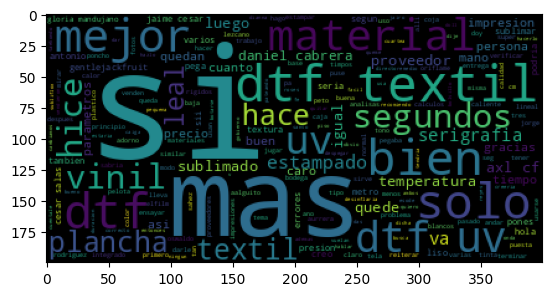

In [ ]:
nube=WordCloud().generate(' '.join(copy_df['ComentarioLimpioSTW']))
plt.imshow(nube)
plt.show()

In [ ]:
copy_df.shape

(87, 6)

#Conteo de palabras más comunes

In [ ]:
def palabras_mas_comunes(columna, top_n=20):
    # 1. Unir todas las filas en un solo texto gigante y separar por palabras
    # Usamos .astype(str) por seguridad y .str.split()
    todas_las_palabras = columna.str.cat(sep=' ').lower().split()

    # 2. Contar frecuencias
    conteo = Counter(todas_las_palabras)

    # 3. Convertir a un DataFrame para que sea fácil de leer/graficar
    df_frecuencias = pd.DataFrame(conteo.most_common(top_n),
                                  columns=['Palabra', 'Frecuencia'])

    return df_frecuencias
# Uso:
top_20 = palabras_mas_comunes(copy_df['ComentarioLimpioSTW'], top_n=20)
print(top_20)

        Palabra  Frecuencia
0            si          32
1           dtf          29
2        textil          17
3            uv          15
4           mas          13
5          bien          10
6          solo          10
7         mejor           9
8      material           8
9      segundos           7
10        vinil           7
11         hice           7
12      plancha           5
13         leal           5
14   serigrafia           4
15           va           4
16    proveedor           4
17  temperatura           4
18          axl           4
19           cf           4


#sacar estadisticas


In [ ]:
#Revisar el comentario con mas likes
#copy_df[copy_df['likesCount'] == copy_df['likesCount'].max()]

#los 5 mas altos
top_5 = copy_df.nlargest(5, 'likesCount')
top_5

,likesCount,text,commentsCount,Coment_LBasica,ComentarioLimpio,ComentarioLimpioSTW
9,9,"Si se puede, yo hice más fe 1000 balones el añ...",6.0,si se puede yo hice más fe balones el año pasa...,si se puede yo hice mas fe balones el ano pasa...,si hice mas fe ano pasado gobierno quedan bien...
2,5,Ni DTF UV. ni DTF TEXTIL ambos se vuelan.\nImp...,3.0,ni dtf uv ni dtf textil ambos se vuelan impres...,ni dtf uv ni dtf textil ambos se vuelan impres...,dtf uv dtf textil ambos vuelan impresion serig...
3,5,"Si, pero para más duración te recomiendo mejor...",1.0,si pero para más duración te recomiendo mejor ...,si pero para mas duracion te recomiendo mejor ...,si mas duracion recomiendo mejor serigrafia
15,5,yo le puse dtf textil a petos de taekondo sin ...,5.0,yo le puse dtf textil a petos de taekondo sin ...,yo le puse dtf textil a petos de taekondo sin ...,puse dtf textil petos taekondo ningun problema
34,5,"Sii, yo lo hacía con dtf textil antes de conoc...",6.0,sii yo lo hacía con dtf textil antes de conoce...,sii yo lo hacia con dtf textil antes de conoce...,sii hacia dtf textil conocer uv textil tener c...


In [ ]:
top_5 = copy_df.nlargest(5, 'commentsCount')
top_5

,likesCount,text,commentsCount,Coment_LBasica,ComentarioLimpio,ComentarioLimpioSTW
1,2,Con dtf normal y plancha pequeña de mano. Por ...,14.0,con dtf normal y plancha pequeña de mano por q...,con dtf normal y plancha pequena de mano por q...,dtf normal plancha pequena mano dtf uv rigidos...
9,9,"Si se puede, yo hice más fe 1000 balones el añ...",6.0,si se puede yo hice más fe balones el año pasa...,si se puede yo hice mas fe balones el ano pasa...,si hice mas fe ano pasado gobierno quedan bien...
34,5,"Sii, yo lo hacía con dtf textil antes de conoc...",6.0,sii yo lo hacía con dtf textil antes de conoce...,sii yo lo hacia con dtf textil antes de conoce...,sii hacia dtf textil conocer uv textil tener c...
15,5,yo le puse dtf textil a petos de taekondo sin ...,5.0,yo le puse dtf textil a petos de taekondo sin ...,yo le puse dtf textil a petos de taekondo sin ...,puse dtf textil petos taekondo ningun problema
59,1,"Eso es sublimado Bro, compra del los balones q...",5.0,eso es sublimado bro compra del los balones qu...,eso es sublimado bro compra del los balones qu...,sublimado bro compra venden bodega aurrera


#Usar nuestro modelo de huggingface para clasificar los sentimentos


In [ ]:
copy_df.head()

,likesCount,text,commentsCount,Coment_LBasica,ComentarioLimpio,ComentarioLimpioSTW
0,1,Para dar en qué precio los balones ????,4.0,para dar en qué precio los balones,para dar en que precio los balones,dar precio
1,2,Con dtf normal y plancha pequeña de mano. Por ...,14.0,con dtf normal y plancha pequeña de mano por q...,con dtf normal y plancha pequena de mano por q...,dtf normal plancha pequena mano dtf uv rigidos...
2,5,Ni DTF UV. ni DTF TEXTIL ambos se vuelan.\nImp...,3.0,ni dtf uv ni dtf textil ambos se vuelan impres...,ni dtf uv ni dtf textil ambos se vuelan impres...,dtf uv dtf textil ambos vuelan impresion serig...
3,5,"Si, pero para más duración te recomiendo mejor...",1.0,si pero para más duración te recomiendo mejor ...,si pero para mas duracion te recomiendo mejor ...,si mas duracion recomiendo mejor serigrafia
4,4,Si se puede Pero se va a despegar si lo usan,NaN,si se puede pero se va a despegar si lo usan,si se puede pero se va a despegar si lo usan,si va despegar si usan


In [ ]:
#reordena las columnas
# 1. Identificar columnas numéricas en copy_df
cols_numericas = copy_df.select_dtypes(include=['number']).columns.tolist()

# 2. Identificar el resto de las columnas (las que NO son numéricas) en copy_df
cols_resto = copy_df.select_dtypes(exclude=['number']).columns.tolist()

# 3. Reordenar el DataFrame original usando la combinación de ambas listas
copy_df=copy_df[cols_numericas + cols_resto]

In [ ]:
copy_df.head()

,likesCount,commentsCount,text,Coment_LBasica,ComentarioLimpio,ComentarioLimpioSTW
0,1,4.0,Para dar en qué precio los balones ????,para dar en qué precio los balones,para dar en que precio los balones,dar precio
1,2,14.0,Con dtf normal y plancha pequeña de mano. Por ...,con dtf normal y plancha pequeña de mano por q...,con dtf normal y plancha pequena de mano por q...,dtf normal plancha pequena mano dtf uv rigidos...
2,5,3.0,Ni DTF UV. ni DTF TEXTIL ambos se vuelan.\nImp...,ni dtf uv ni dtf textil ambos se vuelan impres...,ni dtf uv ni dtf textil ambos se vuelan impres...,dtf uv dtf textil ambos vuelan impresion serig...
3,5,1.0,"Si, pero para más duración te recomiendo mejor...",si pero para más duración te recomiendo mejor ...,si pero para mas duracion te recomiendo mejor ...,si mas duracion recomiendo mejor serigrafia
4,4,NaN,Si se puede Pero se va a despegar si lo usan,si se puede pero se va a despegar si lo usan,si se puede pero se va a despegar si lo usan,si va despegar si usan


In [ ]:
copy_df =copy_df.sort_values(by='likesCount', ascending=False)

In [ ]:
copy_df.head()

,likesCount,commentsCount,text,Coment_LBasica,ComentarioLimpio,ComentarioLimpioSTW
9,9,6.0,"Si se puede, yo hice más fe 1000 balones el añ...",si se puede yo hice más fe balones el año pasa...,si se puede yo hice mas fe balones el ano pasa...,si hice mas fe ano pasado gobierno quedan bien...
3,5,1.0,"Si, pero para más duración te recomiendo mejor...",si pero para más duración te recomiendo mejor ...,si pero para mas duracion te recomiendo mejor ...,si mas duracion recomiendo mejor serigrafia
2,5,3.0,Ni DTF UV. ni DTF TEXTIL ambos se vuelan.\nImp...,ni dtf uv ni dtf textil ambos se vuelan impres...,ni dtf uv ni dtf textil ambos se vuelan impres...,dtf uv dtf textil ambos vuelan impresion serig...
15,5,5.0,yo le puse dtf textil a petos de taekondo sin ...,yo le puse dtf textil a petos de taekondo sin ...,yo le puse dtf textil a petos de taekondo sin ...,puse dtf textil petos taekondo ningun problema
34,5,6.0,"Sii, yo lo hacía con dtf textil antes de conoc...",sii yo lo hacía con dtf textil antes de conoce...,sii yo lo hacia con dtf textil antes de conoce...,sii hacia dtf textil conocer uv textil tener c...


In [ ]:
pipe = pipeline("sentiment-analysis")

print(pipe("Ni DTF UV. ni DTF TEXTIL"))

pipe=pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'NEGATIVE', 'score': 0.9931169748306274}]


Device set to use cpu


#Llamar a nuestro Modelo

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
# Cargar modelo y tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


In [ ]:
# Diccionario de mapeo
sentiment_labels = { 1: "Negativo", 2: "Negativo", 3: "Neutral", 4: "Positivo", 5: "Positivo"}

In [ ]:
def predict_sentiment(text):
   if not isinstance(text, str):
       text = "" # Convert non-string to empty string
   tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
   output = model(**tokens)
   scores = output.logits.softmax(dim=1)
   prediction = torch.argmax(scores, dim=1).item() + 1 # +1 porque empieza en 0
   return prediction, sentiment_labels[prediction]


In [ ]:
#Jugar con las columnas para ver como interpreta en cada limpieza el modelo
copy_df["sentimiento"] = copy_df["text"].apply(predict_sentiment)


In [ ]:
copy_df.head()

,likesCount,commentsCount,text,Coment_LBasica,ComentarioLimpio,ComentarioLimpioSTW,sentimiento
9,9,6.0,"Si se puede, yo hice más fe 1000 balones el añ...",si se puede yo hice más fe balones el año pasa...,si se puede yo hice mas fe balones el ano pasa...,si hice mas fe ano pasado gobierno quedan bien...,"(3, Neutral)"
3,5,1.0,"Si, pero para más duración te recomiendo mejor...",si pero para más duración te recomiendo mejor ...,si pero para mas duracion te recomiendo mejor ...,si mas duracion recomiendo mejor serigrafia,"(3, Neutral)"
2,5,3.0,Ni DTF UV. ni DTF TEXTIL ambos se vuelan.\nImp...,ni dtf uv ni dtf textil ambos se vuelan impres...,ni dtf uv ni dtf textil ambos se vuelan impres...,dtf uv dtf textil ambos vuelan impresion serig...,"(3, Neutral)"
15,5,5.0,yo le puse dtf textil a petos de taekondo sin ...,yo le puse dtf textil a petos de taekondo sin ...,yo le puse dtf textil a petos de taekondo sin ...,puse dtf textil petos taekondo ningun problema,"(5, Positivo)"
34,5,6.0,"Sii, yo lo hacía con dtf textil antes de conoc...",sii yo lo hacía con dtf textil antes de conoce...,sii yo lo hacia con dtf textil antes de conoce...,sii hacia dtf textil conocer uv textil tener c...,"(3, Neutral)"


In [ ]:
from google.colab import files

# 1. Guardar el DataFrame como CSV en el almacenamiento temporal de Colab
copy_df.to_csv('DCBalonesHFSentin.csv', index=False)

# 2. Descargar el archivo creado a tu PC
files.download('DCBalonesHFSentin.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>